Analyzing Profitability-sorted Portfolios of Returns

This project is aimed at analyzing portfolios that are sorted based on firms’ profitability. First, we need to get portfolio returns data from Prof. Kenneth French’s data library: 
•	Visit his webpage at: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

Search for the term “Portfolios Formed on Operating Profitability” and download the CSV file. 
The CSV file provides returns for portfolios that are formed with different methods. Look for the set of monthly returns for equal weighted portfolios (these data start at around line 730) and copy these returns into a separate CSV file. 

a)  Calculate Sharpe ratio for low- (Decile 1 or ‘Lo 10’), medium- (Decile 5), and high-profitability (Decile 10 or ‘Hi 10’) portfolios and compare them. Can you explain the differences and any potential patterns that may emerge? 

b)  Compute semi-deviation for low-, medium-, and high-profitability portfolios. If you compare semi-deviations with std. deviations of these portfolios, what can be said about riskiness of these portfolios? 

c)  Compute and plot drawdown for low-, medium-, and high-profitability portfolios. Also, determine the date and the value of the maximum drawdown of these portfolios. What does this comparison suggest about the downside risk of these portfolios? 


In [1]:
# Import libraries for data manipulation
# these two lines of code usually help to get the code running again. its called a magic function.
# use this when your code downloads external packages
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy.stats

In [2]:
returns_norm = np.random.normal(0.01, 0.04, (10000,1))
returns_norm

array([[ 0.03381385],
       [ 0.05556121],
       [ 0.0177915 ],
       ...,
       [-0.03568233],
       [-0.03389065],
       [-0.02994873]])

In [3]:
np.mean(returns_norm)

0.009499014438627221

In [4]:
Monthlydata = pd.read_csv("Week 02 assignment data.csv",
                    header=0, index_col=0, parse_dates=True, na_values=-99.99)
Monthlydata

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
196307,-1.10,-0.21,-0.41,-1.09,-0.76,0.49,-0.98,-0.38,-1.19,-0.94,-1.14,-0.40,-0.03,1.07,-1.49,-0.48,-1.15,0.12
196308,3.92,4.48,4.73,3.62,4.77,4.44,4.24,4.93,3.00,4.55,4.80,4.74,4.70,4.15,4.29,4.19,4.29,5.35
196309,-0.69,-1.49,-1.58,-0.48,-1.38,-1.50,-0.74,-2.16,-0.69,-0.17,-1.27,-1.48,-0.91,-2.15,-1.50,0.00,-1.84,-2.37
196310,1.37,1.17,1.83,1.50,0.82,1.16,1.48,2.07,2.15,0.52,0.99,0.65,1.48,0.79,1.78,1.18,2.58,1.74
196311,-2.12,-0.93,-1.88,-2.46,-0.50,-1.46,-0.90,-2.24,-3.27,-1.26,-1.12,0.11,-1.60,-1.30,-0.94,-0.87,-0.92,-3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202308,-8.47,-4.16,-3.32,-9.39,-3.55,-4.12,-4.29,-2.99,-10.56,-6.15,-3.20,-3.87,-4.19,-4.05,-4.65,-3.90,-1.71,-4.32
202309,-8.36,-5.29,-4.40,-9.03,-4.84,-5.53,-4.98,-3.99,-10.20,-5.79,-4.51,-5.14,-5.57,-5.48,-4.85,-5.12,-3.20,-4.81
202310,-9.71,-5.16,-4.80,-10.50,-5.44,-4.47,-5.25,-5.20,-11.69,-7.19,-5.19,-5.67,-4.33,-4.62,-6.31,-4.11,-4.74,-5.67
202311,9.41,8.70,8.87,9.71,7.93,8.62,8.64,9.66,10.12,8.56,7.75,8.09,7.90,9.45,9.70,7.51,7.41,11.94


In [5]:
Monthlydata.head(3)

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,2-Dec,3-Dec,4-Dec,5-Dec,6-Dec,7-Dec,8-Dec,9-Dec,Hi 10
196307,-1.10,-0.21,-0.41,-1.09,-0.76,0.49,-0.98,-0.38,-1.19,-0.94,-1.14,-0.40,-0.03,1.07,-1.49,-0.48,-1.15,0.12
196308,3.92,4.48,4.73,3.62,4.77,4.44,4.24,4.93,3.00,4.55,4.80,4.74,4.70,4.15,4.29,4.19,4.29,5.35
196309,-0.69,-1.49,-1.58,-0.48,-1.38,-1.50,-0.74,-2.16,-0.69,-0.17,-1.27,-1.48,-0.91,-2.15,-1.50,0.00,-1.84,-2.37


In [6]:
columns=['Lo 10', 'Med 40', 'Hi 10']
Monthlydata = Monthlydata[columns]
Monthlydata.head(3)

,Lo 10,Med 40,Hi 10
196307,-1.19,-0.21,0.12
196308,3.00,4.48,5.35
196309,-0.69,-1.49,-2.37


In [7]:
Monthlydata.columns = ['LowProf', 'MedProf', 'LargeProf']
Monthlydata = Monthlydata/100
Monthlydata.head()

,LowProf,MedProf,LargeProf
196307,-0.0119,-0.0021,0.0012
196308,0.0300,0.0448,0.0535
196309,-0.0069,-0.0149,-0.0237
196310,0.0215,0.0117,0.0174
196311,-0.0327,-0.0093,-0.0311


In [8]:
scipy.stats.skew(Monthlydata)

array([ 0.4234282 , -0.39287208, -0.28688015])

In [9]:
scipy.stats.kurtosis(Monthlydata)

array([2.79500407, 3.26038434, 2.78430471])

In [10]:
Monthlydata.mean()

LowProf      0.010975
MedProf      0.012327
LargeProf    0.012171
dtype: float64

In [11]:
Monthlydata.std()

LowProf      0.079825
MedProf      0.051867
LargeProf    0.062283
dtype: float64

# ANNUALIZED STD

In [12]:
annual_vol=Monthlydata.std() * np.sqrt(12)
annual_vol

LowProf      0.276521
MedProf      0.179674
LargeProf    0.215756
dtype: float64

In [13]:
Monthlydata.shape

(726, 3)

In [14]:
n_months=Monthlydata.shape[0]
n_years=n_months/12
n_years

60.5

In [15]:
annual_Monthlydata=(1+Monthlydata).prod()**(1/n_years)-1
annual_Monthlydata

LowProf      0.098370
MedProf      0.139895
LargeProf    0.129685
dtype: float64

In [16]:
annual_Monthlydata/annual_vol

LowProf      0.355742
MedProf      0.778604
LargeProf    0.601074
dtype: float64

# SHARPE RATIO
## Annual risk free rate is assume to be 3%

In [17]:
rf=0.03
sharpe_ratio=(annual_Monthlydata-rf)/annual_vol
sharpe_ratio

# The MedProf's sharpe ratio is the higheest meaning it is the best investment compared to SmallProf and LargeProf.
# The MedProf has the least standard deviation 

LowProf      0.247251
MedProf      0.611635
LargeProf    0.462028
dtype: float64

## 1. Standard deviation 

In [18]:
Monthlydata.std()

LowProf      0.079825
MedProf      0.051867
LargeProf    0.062283
dtype: float64

## Semi Deviation 

In [19]:
Monthlydata < 0

,LowProf,MedProf,LargeProf
196307,True,True,False
196308,False,False,False
196309,True,True,True
196310,False,False,False
196311,True,True,True
...,...,...,...
202308,True,True,True
202309,True,True,True
202310,True,True,True
202311,False,False,False


## VaR and CVaR 

### Historical Estimation

In [20]:
np.percentile(Monthlydata, 5,axis=0)*-1

# if you invest at 95%, LowProf maximum loss will be 11% , MedProf will be 7% and LargeProf will be 8%

array([0.11205 , 0.071525, 0.0879  ])

### Parametric estimation

In [21]:
from scipy.stats import norm

In [22]:
z = norm.ppf(0.05)
z

-1.6448536269514729

In [23]:
VaR_Gaussian = -1 * (Monthlydata.mean() + z * Monthlydata.std())
VaR_Gaussian

LowProf      0.120325
MedProf      0.072988
LargeProf    0.090277
dtype: float64

### Cornish-Fisher/Semi-parametric estimation

In [24]:
z = norm.ppf(0.05)
s = scipy.stats.skew(Monthlydata[-120:])
k = scipy.stats.kurtosis(Monthlydata[-120:])
z_cf = (z
    + (z**2 - 1)*s/6
    + (z**3 - 3*z)*k/24
    - (2*z**3 - 5*z)*(s**2)/36)
z_cf  

array([-1.50518776, -1.69081611, -1.62374273])

In [25]:
VaR_cf = -1 * (Monthlydata.mean() + z_cf * Monthlydata[-120:].std())
VaR_cf

LowProf      0.115178
MedProf      0.081965
LargeProf    0.091818
dtype: float64

### Max Drawdown

In [26]:
Monthlydata.head()

,LowProf,MedProf,LargeProf
196307,-0.0119,-0.0021,0.0012
196308,0.0300,0.0448,0.0535
196309,-0.0069,-0.0149,-0.0237
196310,0.0215,0.0117,0.0174
196311,-0.0327,-0.0093,-0.0311


In [27]:
Monthlydata.index

Int64Index([196307, 196308, 196309, 196310, 196311, 196312, 196401, 196402,
            196403, 196404,
            ...
            202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310,
            202311, 202312],
           dtype='int64', length=726)

In [28]:
Monthlydata.index = pd.to_datetime(Monthlydata.index, format='%Y%m').to_period('M')

In [30]:
Monthlydata['2020']

/var/folders/gl/sc9s01490bg0vmyvzpbkn1lm0000gn/T/ipykernel_84023/4265716391.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Monthlydata['2020']


,LowProf,MedProf,LargeProf
2020-01,0.0386,-0.0454,-0.0464
2020-02,-0.0380,-0.0897,-0.0981
2020-03,-0.1936,-0.2325,-0.2625
2020-04,0.2294,0.1612,0.2259
2020-05,0.1368,0.0396,0.0663
2020-06,0.1179,0.0306,0.0615
2020-07,0.0777,0.0158,0.0297
2020-08,0.0253,0.0526,0.0739
2020-09,-0.0069,-0.0418,-0.0431
2020-10,-0.0137,0.0403,-0.0028


In [32]:
wealth = (1+Monthlydata['LargeProf']).cumprod()

<Axes: title={'center': 'wealth index for Large Profit(1980-2021)'}>

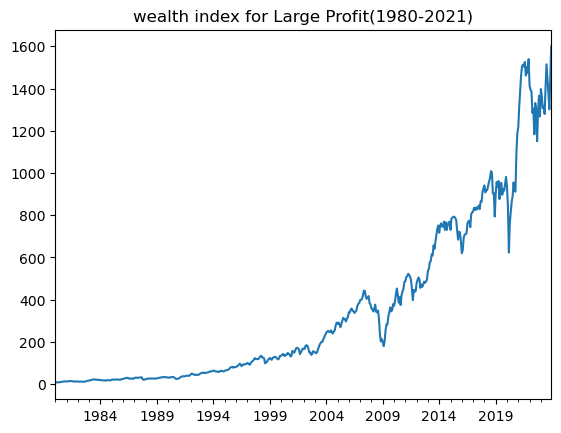

In [34]:
wealth['1980':].plot(title="wealth index for Large Profit(1980-2021)")

<Axes: title={'center': 'wealth Lastpeak'}>

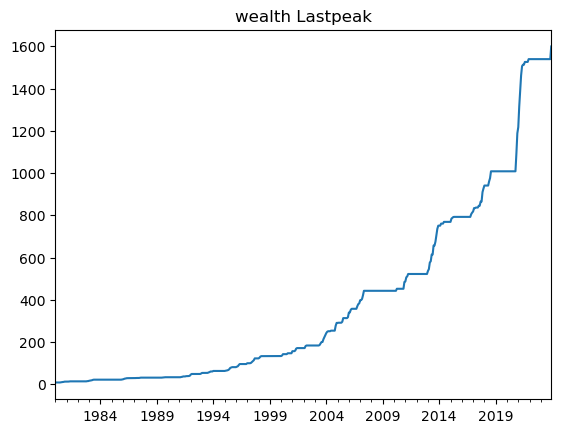

In [36]:
lastpeak = wealth.cummax()
lastpeak['1980':].plot(title="wealth Lastpeak")

<Axes: >

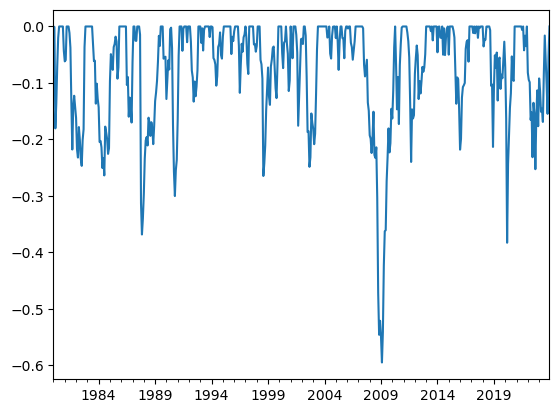

In [38]:
drawdown = (wealth - lastpeak)/lastpeak
drawdown['1980':].plot()